In [26]:

import pandas as pd
import numpy as np

\
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
data = pd.read_csv(url)



URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:

print("First 5 Rows:")
print(data.head())


First 5 Rows:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [ ]:
print("\nDataset Info:")
print(data.info())




Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    str    
 3   smoker      244 non-null    str    
 4   day         244 non-null    str    
 5   time        244 non-null    str    
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), str(4)
memory usage: 13.5 KB
None


In [ ]:
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [ ]:
target_variable = "tip"
print("\nTarget Variable for Regression:", target_variable)



Target Variable for Regression: tip


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
numerical_cols = ['total_bill', 'tip', 'size']

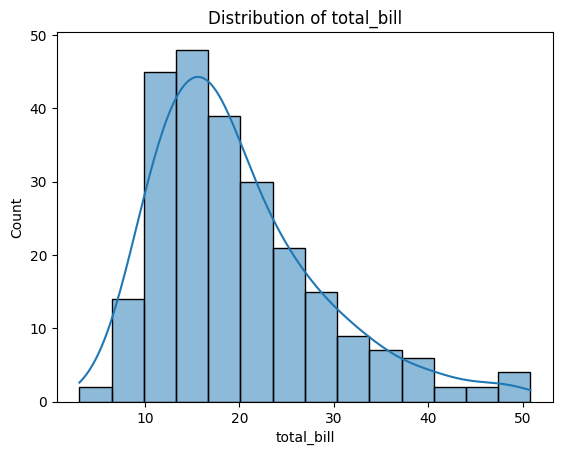

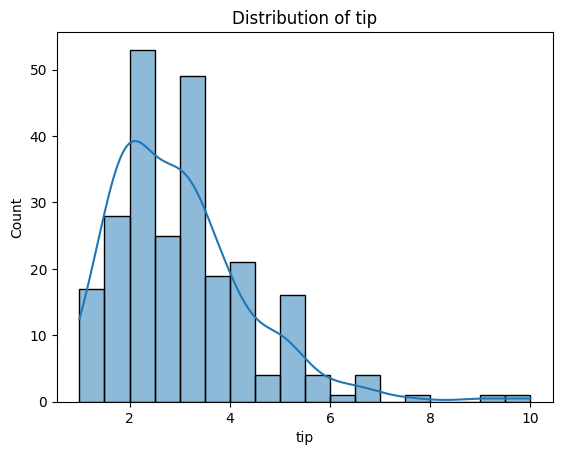

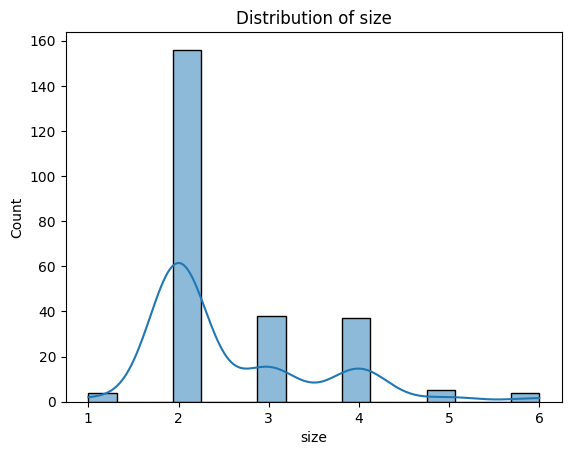

In [ ]:
for col in numerical_cols:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title("Distribution of " + col)
    plt.show()



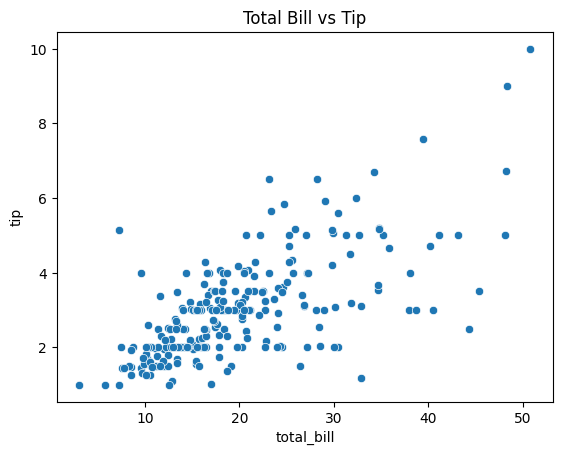

In [ ]:
plt.figure()
sns.scatterplot(x='total_bill', y='tip', data=data)
plt.title("Total Bill vs Tip")
plt.show()



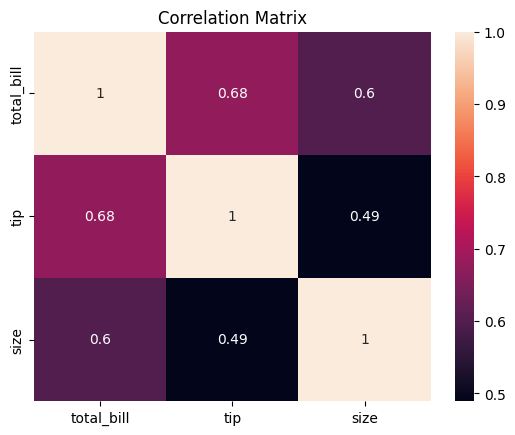

In [ ]:
plt.figure()
sns.heatmap(data[numerical_cols].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
data_before = data.copy()


Q1 = data['total_bill'].quantile(0.25)
Q3 = data['total_bill'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


data = data[(data['total_bill'] >= lower) & (data['total_bill'] <= upper)]


print("Shape Before:", data_before.shape)
print("Shape After:", data.shape)

print("Mean Before:", data_before['total_bill'].mean())
print("Mean After:", data['total_bill'].mean())

print("Justification: IQR method removes extreme values.")


Shape Before: (244, 7)
Shape After: (235, 7)
Mean Before: 19.78594262295082
Mean After: 18.798680851063832
Justification: IQR method removes extreme values.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply scaling
data['total_bill_scaled'] = scaler.fit_transform(data[['total_bill']])

print("Before Scaling:")
print(data['total_bill'].describe())

print("\nAfter Scaling:")
print(data['total_bill_scaled'].describe())


Before Scaling:
count    235.000000
mean      18.798681
std        7.438468
min        3.070000
25%       13.215000
50%       17.460000
75%       23.135000
max       40.170000
Name: total_bill, dtype: float64

After Scaling:
count    2.350000e+02
mean    -2.910202e-16
std      1.002134e+00
min     -2.119019e+00
25%     -7.522515e-01
50%     -1.803514e-01
75%      5.842029e-01
max      2.879213e+00
Name: total_bill_scaled, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = data[['total_bill']]
y = data['tip']


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


print("Library Slope:", model.coef_[0])
print("Library Intercept:", model.intercept_)


mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


covariance = np.cov(data['total_bill'], data['tip'])[0][1]
variance = np.var(data['total_bill'])

manual_slope = covariance / variance

print("Manual Slope:", manual_slope)


X_before = data_before[['total_bill']]
y_before = data_before['tip']

model_before = LinearRegression()
model_before.fit(X_before, y_before)

y_pred_before = model_before.predict(X_before)

r2_before = r2_score(y_before, y_pred_before)

print("R2 Before Outlier Removal:", r2_before)
print("R2 After Outlier Removal:", r2)


Library Slope: 0.10491118865709444
Library Intercept: 0.9292974084316608
Mean Squared Error: 0.8894296029482048
R2 Score: 0.4053934676111247
Manual Slope: 0.10535952707015896
R2 Before Outlier Removal: 0.45661658635167657
R2 After Outlier Removal: 0.4053934676111247
